In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats


In [4]:
data = pd.read_csv("oecd_family.csv")
#합계출산율(Total fertility rate) 추출
birth_rate = data.loc[(data.IND=='FAM1',['Country', 'Year','Value'])]

#2021년 이상 데이터 삭제
birth_rate = birth_rate.drop(birth_rate.loc[birth_rate.Year>=2021].index)

#2012년부터 2020년까지 출산율 결측치 없음
birth_rate.isna().sum()

#인덱스 재정렬
birth_rate.index = range(0,len(birth_rate))

#한글화를 위한 리스트 생성
CountryName = ["이스라엘","룩셈부르크","네덜란드","그리스","아이슬란드","라트비아","슬로베니아","프랑스","폴란드","튀르키예","스페인","벨기에","멕시코","아일랜드","스위스","핀란드","칠레","캐나다","대한민국","뉴질랜드","오스트레일리아","헝가리","미국","영국","오스트리아","스웨덴","덴마크","슬로바키아","체코","콜롬비아","일본","노르웨이","코스타리카","리투아니아","독일","에스토니아","포르투갈","이탈리아"]

#영어이름을 한글로
for i in range(0,38):
    for j in range(0,9):
        birth_rate.loc[i*9:i*9+j,"Country"] = CountryName[i]
birth_rate

,Country,Year,Value
0,이스라엘,2012,3.05
1,이스라엘,2013,3.03
2,이스라엘,2014,3.08
3,이스라엘,2015,3.09
4,이스라엘,2016,3.11
...,...,...,...
337,이탈리아,2016,1.36
338,이탈리아,2017,1.34
339,이탈리아,2018,1.31
340,이탈리아,2019,1.27


In [5]:
#경제활동인구(여자)중 경제활동 참가율 data
df2 = pd.read_csv("경제활동인구 및 참가율(OECD).csv", encoding= "euc-kr", skiprows = 1)
plt.rcParams['font.family'] = 'NanumGothicOTF'

#column(열) 이름 바꾸기 = 연도
df2= df2.rename(columns = {'여자 (%)' : '2012'})
for i in range(1,10):
    df2 = df2.rename(columns = {'여자 (%).{}'.format(i): str(2012+i)} )

namelist = []
#row(행) 이름 바꾸기. = 국가    
for i in range(len(df2)):
    x = df2.loc[i,'국가별'].find("(")
    name = df2.loc[i,'국가별']
    if(x != -1):
        name = name[:x]
        namelist.append(name)
        df2.rename(index = {i :name},inplace = True)
    else:
        df2.rename(index = {i :name},inplace = True)

#필요한 데이터만 추출.
col_name = []
for i in range(2012,2021):
    col_name.append(str(i))

rate_df = df2[col_name]

#NaN 값 제거.
rate_df.drop(rate_df.index[0], inplace= True)
rate_df.dropna(inplace=True)
rate_df.head()

#빈값 찾기.
col = rate_df.columns.values

index = rate_df.index.values
outlier = {}
for i in index:
    for c in col:
        if (rate_df.loc[i,str(c)] == '-'):
            outlier[c] = i

#국가별 평균값으로 빈값 찾기.
sum = 0
for key in outlier.keys():
    sum = 0
    for c in col:
        if (c == key):
            continue
        else:
            sum += float(rate_df.loc[outlier.get(key),str(c)])
    rate_df.loc[outlier.get(key), key] = round(sum/(len(col)-len(outlier)),1)

country = []
year = []
value = []
rate_val = []

#새로운 데이터 만들기 위한 값 배치.
for i in range(len(namelist)):
    for j in range(2012,2021):
        country.append(namelist[i])
        year.append(j)

for i in range(len(country)):
    rate_val.append(float(rate_df[str(year[i])][country[i]]))
    
#전처리 완료한 데이터.
rate_df = pd.DataFrame({
    'Country' : country,
    'Year' : year,
    'rate_val' : rate_val
})

/var/folders/ls/8g_ybb8s6493dzrgbbh9shjc0000gn/T/ipykernel_79101/372361000.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate_df.drop(rate_df.index[0], inplace= True)
/var/folders/ls/8g_ybb8s6493dzrgbbh9shjc0000gn/T/ipykernel_79101/372361000.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate_df.dropna(inplace=True)


In [6]:
rate_df

,Country,Year,rate_val
0,대한민국,2012,50.1
1,대한민국,2013,50.3
2,대한민국,2014,51.5
3,대한민국,2015,51.9
4,대한민국,2016,52.2
...,...,...,...
337,뉴질랜드,2016,64.6
338,뉴질랜드,2017,65.5
339,뉴질랜드,2018,65.7
340,뉴질랜드,2019,65.8


In [7]:
df = pd.read_csv("OECD 국가의 주요지표.csv", encoding= "euc-kr", skiprows = 1)

#column(열) 이름 바꾸기 = 연도
df= df.rename(columns = {'국내총생산(GDP)(당해년 가격) (10억US$)' : '2012'})

for i in range(1,10):
    df = df.rename(columns = {'국내총생산(GDP)(당해년 가격) (10억US$).{}'.format(i): str(2012+i)} )

#row(행) 이름 바꾸기. = 국가
for i in range(len(df)):
    df.rename(index = {i :df.loc[i,'국가별']},inplace = True)

#필요한 GDP 데이터만 데이터프레임으로 추출.
#column 이름으로 추출.
col_name = []
for i in range(2012,2021):
    col_name.append(str(i))

GDP_df = df[col_name]

#NaN 값 제거.
GDP_df.drop(GDP_df.index[0], inplace= True)
GDP_df.dropna(inplace=True)

#OECD 총값 제거.
GDP_df.drop(GDP_df.tail(1).index,inplace=True)
#빈값, 잘못된 값 찾기
col = GDP_df.columns.values

index = GDP_df.index.values
outlier = {}
for i in index:
    for c in col:
        if (GDP_df.loc[i,str(c)] == '-'):
            outlier[c] = i
#빈값, 잘못된 값을 각 국의 평균값으로 대체.
sum = 0
for key in outlier.keys():
    sum = 0
    for c in col:
        if (c == key):
            continue
        else:
            sum += float(GDP_df.loc[outlier.get(key),str(c)])
    GDP_df.loc[outlier.get(key), key] = round(sum/(len(col)-len(outlier)),1)

country = []
year = []
value = []
gdp_val = []

#새로운 데이터 만들기 위한 값 배치.
for i in range(len(namelist)):
    for j in range(2012,2021):
        country.append(namelist[i])
        year.append(j)

for i in range(len(country)):
    gdp_val.append(float(GDP_df[str(year[i])][country[i]]))
    
#전처리 완료한 데이터.
gdp_df = pd.DataFrame({
    'Country' : country,
    'Year' : year,
    'gdp_val' : gdp_val
})

gdp_df

/var/folders/ls/8g_ybb8s6493dzrgbbh9shjc0000gn/T/ipykernel_79101/771481087.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GDP_df.drop(GDP_df.index[0], inplace= True)
/var/folders/ls/8g_ybb8s6493dzrgbbh9shjc0000gn/T/ipykernel_79101/771481087.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GDP_df.dropna(inplace=True)
/var/folders/ls/8g_ybb8s6493dzrgbbh9shjc0000gn/T/ipykernel_79101/771481087.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

,Country,Year,gdp_val
0,대한민국,2012,1278.0
1,대한민국,2013,1370.6
2,대한민국,2014,1484.0
3,대한민국,2015,1465.3
4,대한민국,2016,1500.0
...,...,...,...
337,뉴질랜드,2016,188.9
338,뉴질랜드,2017,207.0
339,뉴질랜드,2018,212.2
340,뉴질랜드,2019,209.1


In [8]:
totaldf = pd.merge(birth_rate, rate_df, on = ['Country','Year'])
totaldf= pd.merge(totaldf, gdp_df, on = ['Country', 'Year'])

In [9]:
totaldf.isna().sum()

Country     0
Year        0
Value       0
rate_val    0
gdp_val     0
dtype: int64

In [10]:
for i in range(2012,2021):
    d = totaldf[totaldf['Year']== i]
    x = d['Value']
    y = d['rate_val']

    #H0: 상관관계가 없다. / H1: 상관관계가 있다.
    #상관계수, p-value
    print(i,'상관계수, p-value')
    s,p = stats.pearsonr(x,y)
    if(s<0):
        print("음의 상관관계를 가짐", s)
    else:
        print("양의 상관관계를 가짐", s)
    
    if(p<0.05):
        print("상관관계가 있다.")
    # else:
    #     print("상관관계가 없다.")
    

2012 상관계수, p-value
양의 상관관계를 가짐 0.21234569951287055
2013 상관계수, p-value
양의 상관관계를 가짐 0.18738125136446118
2014 상관계수, p-value
양의 상관관계를 가짐 0.1572032260383036
2015 상관계수, p-value
양의 상관관계를 가짐 0.13069105757011065
2016 상관계수, p-value
양의 상관관계를 가짐 0.11152545257677071
2017 상관계수, p-value
양의 상관관계를 가짐 0.07168862677834537
2018 상관계수, p-value
양의 상관관계를 가짐 0.09041416695220794
2019 상관계수, p-value
양의 상관관계를 가짐 0.11511904262096173
2020 상관계수, p-value
양의 상관관계를 가짐 0.05282535879227615


In [11]:
for i in namelist:
    d = totaldf[totaldf['Country']== i]
    x = d['Value']
    y = d['rate_val']

    #H0: 상관관계가 없다. / H1: 상관관계가 있다.
    #상관계수, p-value
    # print(i,'상관계수, p-value')
    s,p = stats.pearsonr(x,y)
    # if(s<0):
    #     print("음의 상관관계를 가짐", s)
    # else:
    #     print("양의 상관관계를 가짐", s)
    
    if(p<0.05):
        print(i)
        print("상관관계가 있다.")
    # else:
    #     print("상관관계가 없다.")
    

대한민국
상관관계가 있다.
일본
상관관계가 있다.
벨기에
상관관계가 있다.
체코
상관관계가 있다.
에스토니아
상관관계가 있다.
프랑스
상관관계가 있다.
독일
상관관계가 있다.
그리스
상관관계가 있다.
헝가리
상관관계가 있다.
룩셈부르크
상관관계가 있다.
노르웨이
상관관계가 있다.
슬로바키아
상관관계가 있다.
슬로베니아
상관관계가 있다.
스웨덴
상관관계가 있다.
영국
상관관계가 있다.
오스트레일리아
상관관계가 있다.
뉴질랜드
상관관계가 있다.


Text(0, 0.5, 'rate')

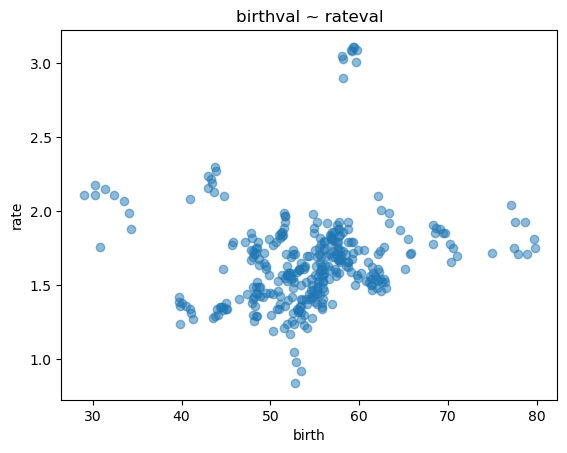

In [33]:
# totaldf1 = totaldf[totaldf['Country']== '대한민국']    
totaldf1 = totaldf[totaldf['Year']== 2012]


x = totaldf['Value']
y = totaldf['rate_val']

plt.scatter(y,x,alpha = 0.5)
plt.title('birthval ~ rateval')
plt.xlabel('birth')
plt.ylabel('rate')

Text(0.5, 1.0, 'y = 0.005064x + (1.383207)')

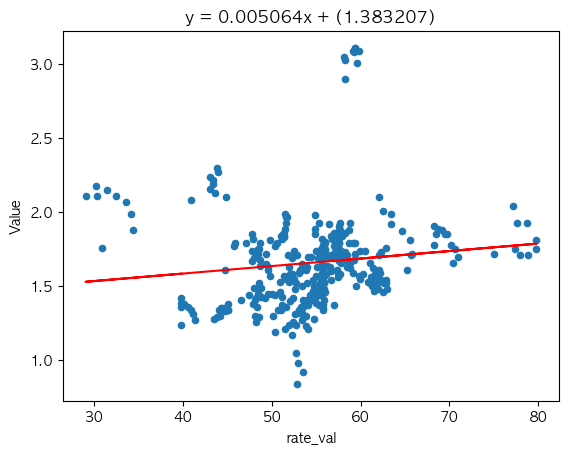

In [79]:
import numpy as np
from sklearn.metrics import r2_score

totaldf.plot(kind = "scatter",x = 'rate_val', y = 'Value')
fit_weight = np.polyfit(totaldf['rate_val'], totaldf['Value'],1)
trend_f = np.poly1d(fit_weight)
#r2(결정계수): 회귀 모델에서 독립변수가 종속 변수를 얼마만큼 설명해 주는지를 가리키는 지표.
# r2 = r2_score(totaldf['Value'], trend_f(totaldf['rate_val']))

plt.plot(totaldf['rate_val'], trend_f(totaldf['rate_val']),"r-")
plt.title("y = {:.6f}x + ({:.6f})".format(fit_weight[0], fit_weight[1]))
# plt.title("y = {:.6f}x + ({:.6f}) [R2 = {:.6f}]".format(fit_weight[0], fit_weight[1], r2))

In [21]:
for i in range(2012,2021):
    d = totaldf[totaldf['Year']== i].corr(method = 'pearson')
    print(i)
    print(d)
    print()

2012
          Year     Value  rate_val   gdp_val
Year       NaN       NaN       NaN       NaN
Value      NaN  1.000000  0.212346  0.022321
rate_val   NaN  0.212346  1.000000  0.001368
gdp_val    NaN  0.022321  0.001368  1.000000

2013
          Year     Value  rate_val   gdp_val
Year       NaN       NaN       NaN       NaN
Value      NaN  1.000000  0.187381  0.044375
rate_val   NaN  0.187381  1.000000  0.002937
gdp_val    NaN  0.044375  0.002937  1.000000

2014
          Year     Value  rate_val   gdp_val
Year       NaN       NaN       NaN       NaN
Value      NaN  1.000000  0.157203  0.040979
rate_val   NaN  0.157203  1.000000  0.002405
gdp_val    NaN  0.040979  0.002405  1.000000

2015
          Year     Value  rate_val   gdp_val
Year       NaN       NaN       NaN       NaN
Value      NaN  1.000000  0.130691  0.041445
rate_val   NaN  0.130691  1.000000 -0.002518
gdp_val    NaN  0.041445 -0.002518  1.000000

2016
          Year     Value  rate_val   gdp_val
Year       NaN       NaN  

In [52]:
import numpy as np
x = totaldf['rate_val']
y = totaldf['Value']

#공분산
np.cov(x,y)[0,1]
np.corrcoef(x,y)[0,1]

0.12363479626936749

In [53]:
import scipy.stats as stats
#H0: 상관관계가 없다. / H1: 상관관계가 있다.
#상관계수, p-value
stats.pearsonr(x,y)
#pvalue가 0.02로 유의수준 0.05미만으로 귀무가설 기각.
#하지만 상관계수가 0.1로 상관관계는 없다고 할 수 있다.

(0.12363479626936758, 0.022206470613729667)

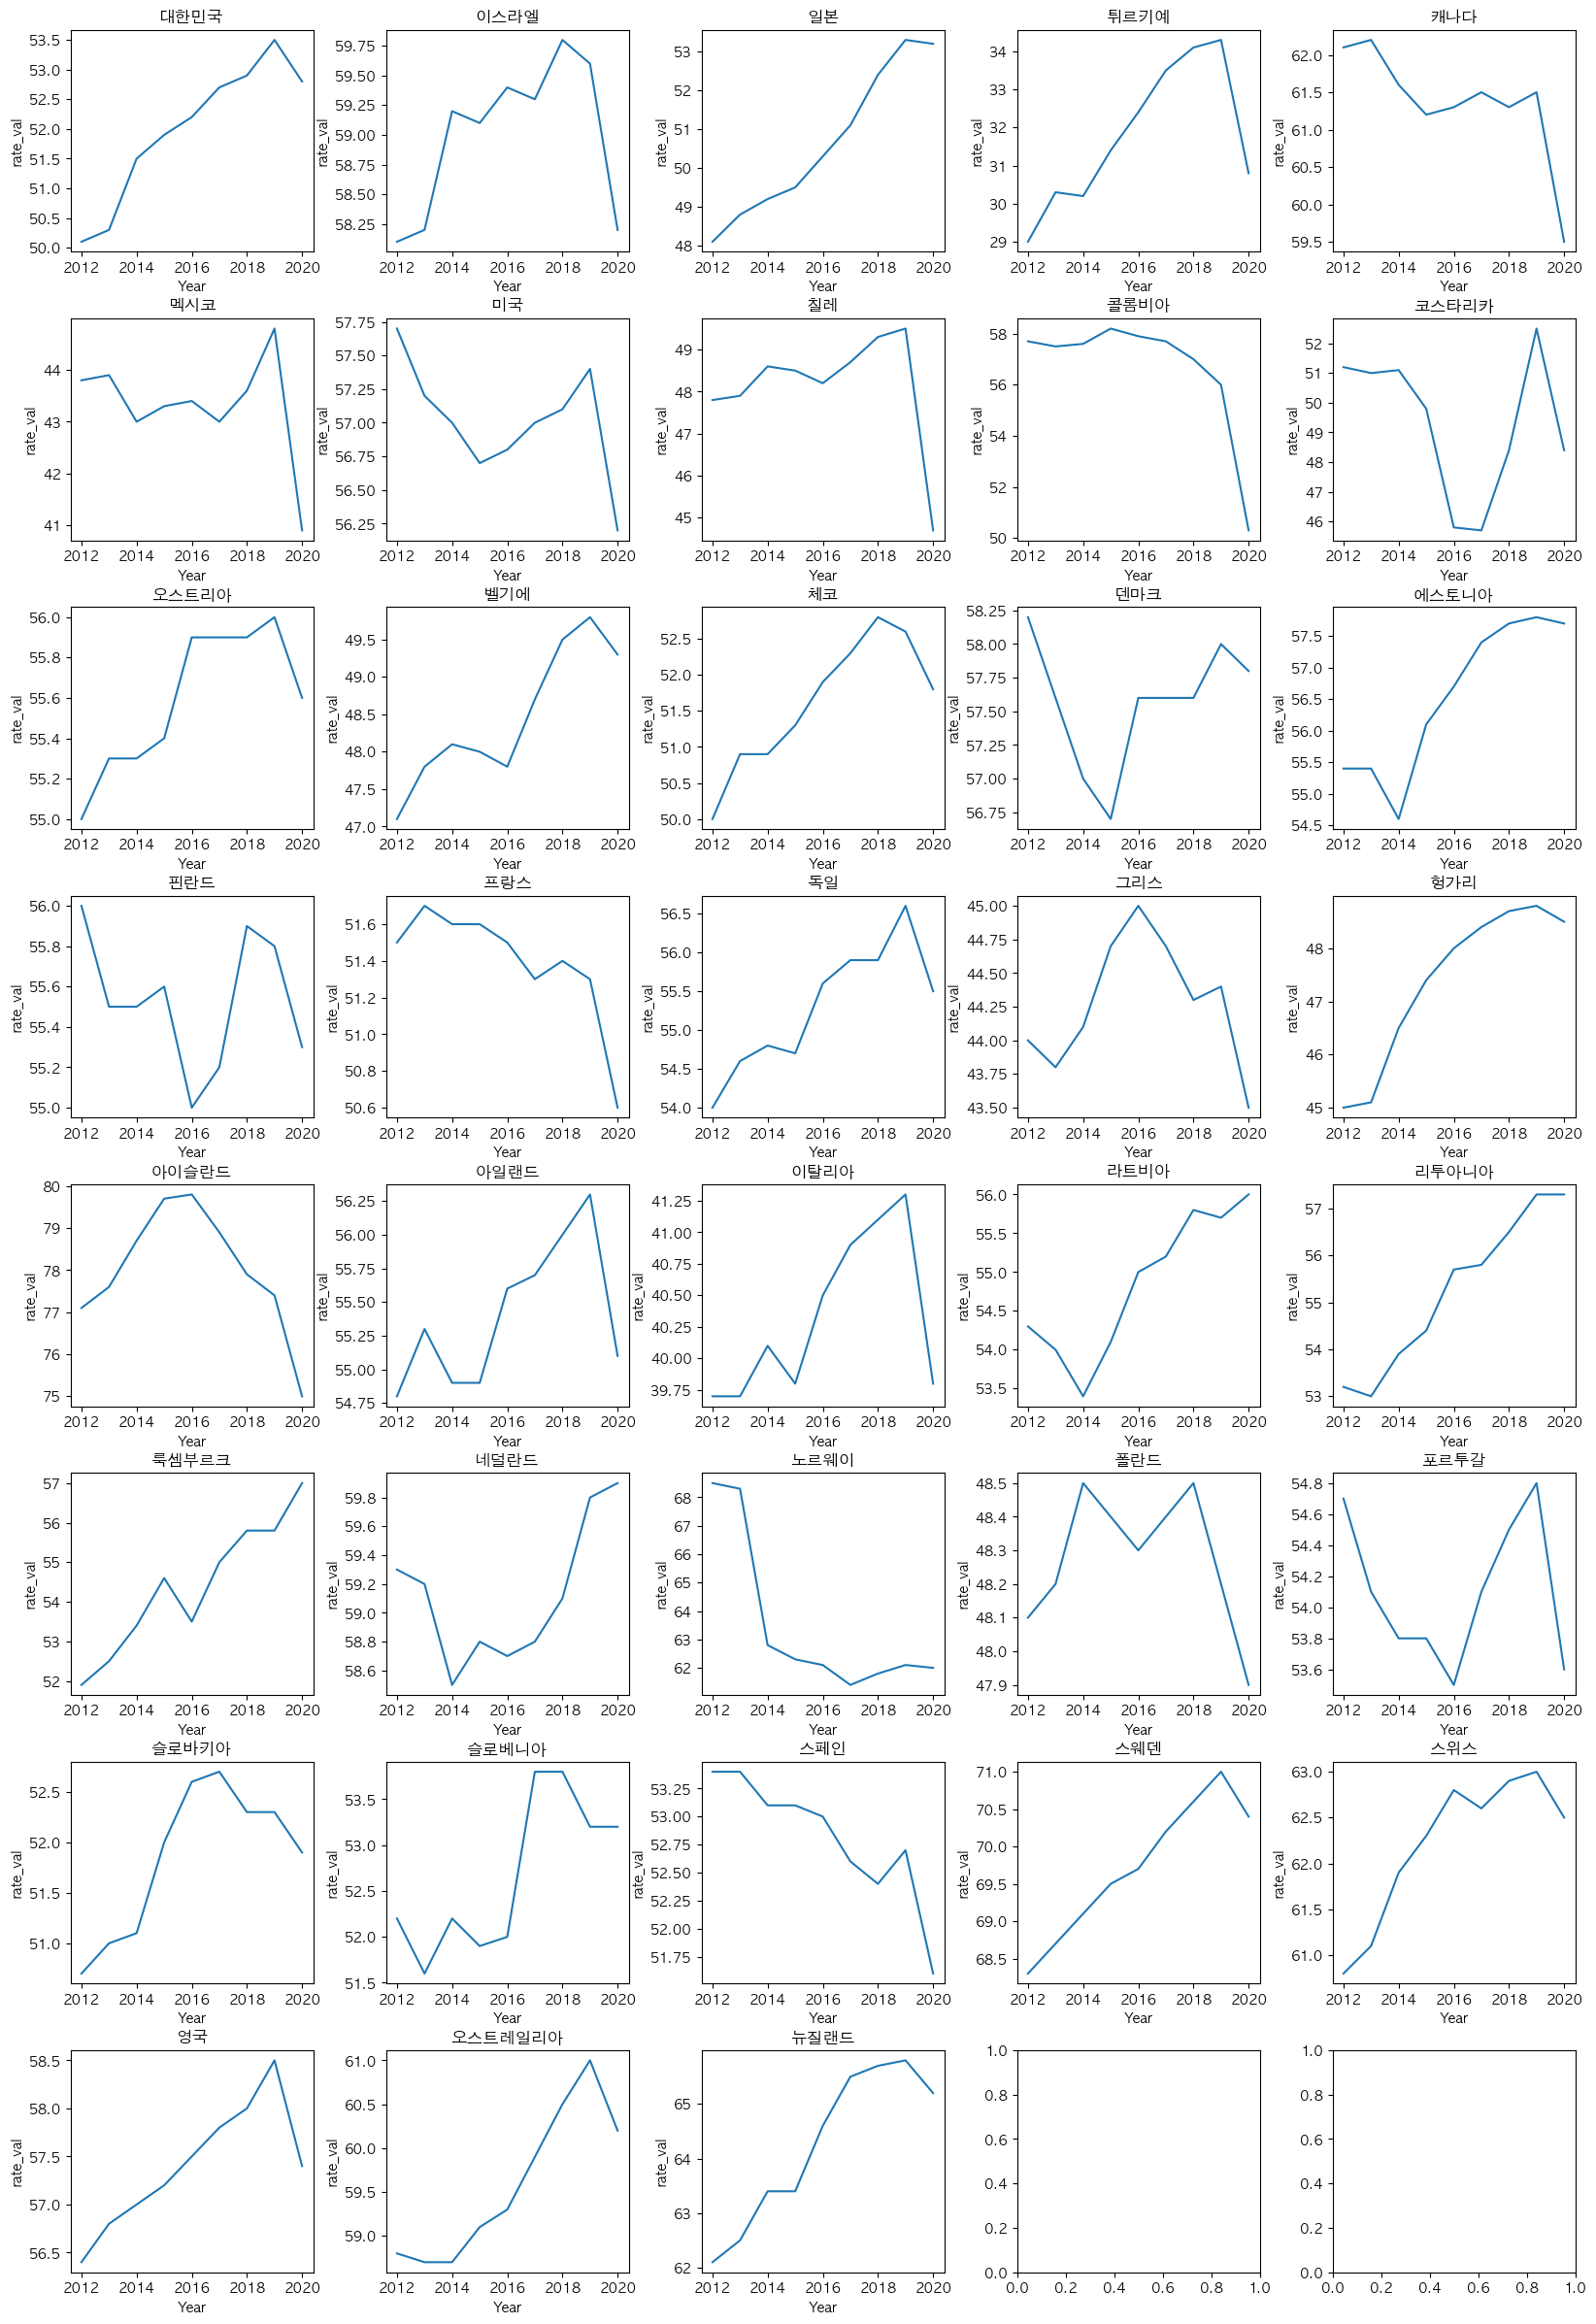

In [76]:
#데이터 시각화?
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib import rc

rc('font', family = 'AppleGothic')

fig, ax = plt.subplots(ncols = 5, nrows = 8)
fig.set_size_inches((20,30))
fig.subplots_adjust(wspace = 0.3, hspace = 0.3)

try:
    i = 0
    for x in range(8):
        for y in range(5):
            d = rate_df[rate_df['Country'] == namelist[i]]
            sns.lineplot(x = 'Year', y = 'rate_val', data = d, ax = ax[x,y])
            ax[x,y].set_title(namelist[i])
            i = i+1
except:
    print()
